In [115]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


#### Data Preprocessing & augmentation inside the layered model

In [105]:
NUM_CLASSES = 5
IMG_SIZE = 64
HEIGHT_FACTOR = 0.2
WIDTH_FACTOR = 0.2



model = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(HEIGHT_FACTOR, WIDTH_FACTOR),
    layers.RandomZoom(0.2),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(NUM_CLASSES, activation="softmax")
])


# Compile and train your model as usual
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Get data 

In [126]:
# Set the parameters for your data
batch_size = 32
image_size = (64, 64)
validation_split = 0.2

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='C:/3TI/AI/data/training_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='C:/3TI/AI/data/training_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Create the testing dataset from the 'test' directory
test_ds = image_dataset_from_directory(
    directory='C:/3TI/AI/data/testing_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size
)



Found 870 files belonging to 5 classes.
Using 696 files for training.
Found 870 files belonging to 5 classes.
Using 174 files for validation.
Found 221 files belonging to 5 classes.


#### Training

In [107]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6) # lagere patience stopt het model sneller
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds), # aantal stappen obv de dataset
    validation_steps=len(validation_ds), # aantal stappen obv de dataset
    epochs=100,
    callbacks=[callback] # callback voor vroegtijdige stopzetting
)


Epoch 1/100


22/22 [==============================] - 3s 58ms/step - loss: 1.6447 - accuracy: 0.1839 - val_loss: 1.6111 - val_accuracy: 0.1782
Epoch 2/100
22/22 [==============================] - 1s 54ms/step - loss: 1.6072 - accuracy: 0.2112 - val_loss: 1.6074 - val_accuracy: 0.1954
Epoch 3/100
22/22 [==============================] - 1s 52ms/step - loss: 1.6095 - accuracy: 0.2198 - val_loss: 1.6037 - val_accuracy: 0.2701
Epoch 4/100
22/22 [==============================] - 1s 50ms/step - loss: 1.5975 - accuracy: 0.2672 - val_loss: 1.5707 - val_accuracy: 0.2759
Epoch 5/100
22/22 [==============================] - 1s 50ms/step - loss: 1.5716 - accuracy: 0.2759 - val_loss: 1.4909 - val_accuracy: 0.3218
Epoch 6/100
22/22 [==============================] - 1s 50ms/step - loss: 1.4970 - accuracy: 0.3520 - val_loss: 1.4561 - val_accuracy: 0.3851
Epoch 7/100
22/22 [==============================] - 1s 51ms/step - loss: 1.4836 - accuracy: 0.3491 - val_loss: 1.4521 - val_accuracy: 0.3563
Epoch 8/100
22/22 

#### Result visualization

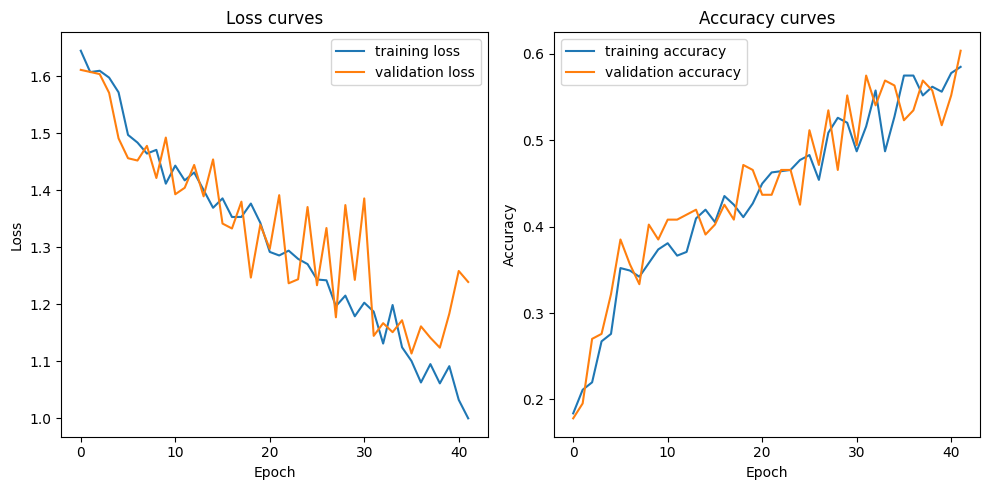

In [108]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [109]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 12ms/step - loss: 1.2722 - accuracy: 0.5339
Test accuracy: 0.5339366793632507


#### Confusion matrix


7/7 [==============================] - 0s 13ms/step


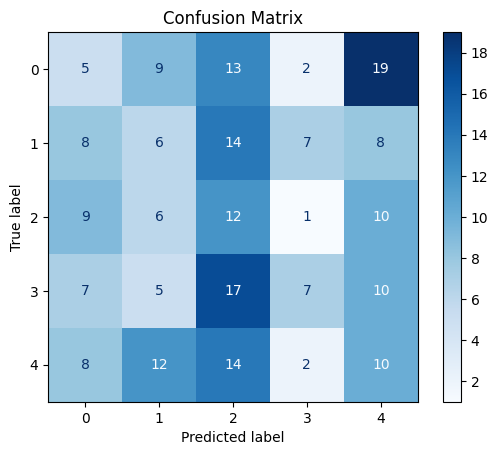

In [114]:
# Evaluate the model on the test dataset
predictions = model.predict(test_ds)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Convert the one-hot encoded labels to class indices
y_true_indices = np.argmax(y_true, axis=1)
predictions_indices = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_indices, predictions_indices, labels=range(NUM_CLASSES))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(NUM_CLASSES))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Google's confusion matrix
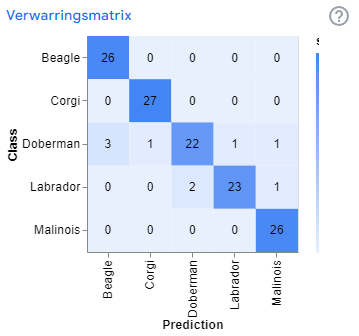